In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist, pdist

## Question 1. 

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('data/hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,2.090884,7.405251,2.450357,3.191506,2.426240
2,2.498841,7.292161,2.468256,2.975176,2.710137
3,2.009998,7.408158,2.486901,2.863235,2.561799
4,2.236813,7.245803,2.181933,2.825106,2.599706


#### a) First, guess the number of clusters we could have. 

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. 

#### c) Visualize the clustering result and color the points according to the labels obtained in part b). 

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? 

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). 

In [3]:
# lets say n_clusters=3
# since there 5 features given and before applying k-Means, 
# Standardizing the data and applying PCA to data to have 2 principal component
# Standardizing the features
x = StandardScaler().fit_transform(data1)
# Applying PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['X', 'Y'])
principalDf.head()

,X,Y
0,0.510642,0.417088
1,-2.743279,-0.753203
2,-2.807171,-0.640288
3,-2.688149,-0.767065
4,-2.606136,-0.683608


In [4]:
# Applying K-means to principalDf
km=KMeans(random_state=1,n_clusters=3)
res=km.fit(principalDf) #train the model
y_t=res.labels_
print(y_t) #output the result

[0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


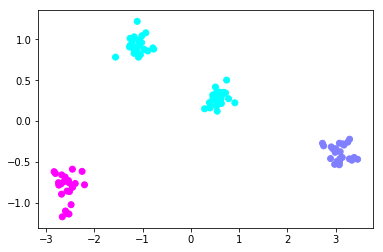

In [5]:
# Visualizing the cluster on scatter plot
plt.scatter(principalDf.X,principalDf.Y,c=y_t,cmap=plt.cm.cool)

In [6]:
# Using silhouette_score to find the optimal number of clusters
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(principalDf)
    #report average Silhouette score
    silhouette_avg = silhouette_score(principalDf, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.6093029782970727
For n_clusters =3, the average silhouette_score is :0.7455101910713924
For n_clusters =4, the average silhouette_score is :0.8821714922362173
For n_clusters =5, the average silhouette_score is :0.7820319915609576


Maximum value of silhouette_score i.e 0.8821714922362173 appears when the number of clusters are 4

In [7]:
# using elbow method to find out the optimal number of clusters
def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

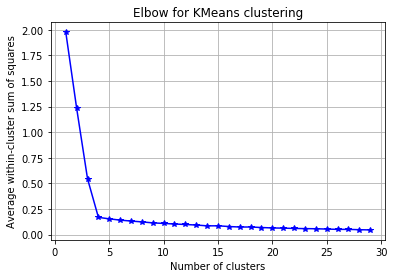

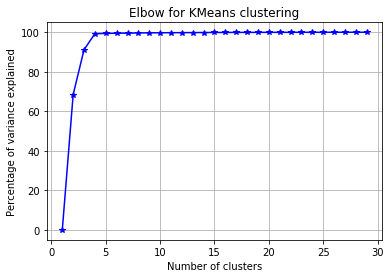

In [8]:
# Using the elbow method to find out the optimal number of clusters
elbow(principalDf, range(1,30))

Explaination : 
    As we can see in the graphs, there is not much significant drop in average sum of squares within the cluster when we have 4 cluster and no significant increase in the variance percentage at number of cluster = 4, that's the elbow point.
    And also from silhouette_score, we found the max value achieved is when n_clusters = 4
This shows that our guess of going with n_clusters=3 was not correct. Lets go with n_clusters=4 and compare results.

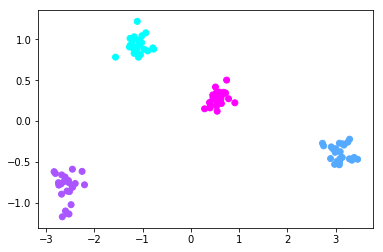

In [9]:
# K-means with cluster = 4 and visualizing
km=KMeans(random_state=1,n_clusters=4)
res=km.fit(principalDf) #train the model
y_t=res.labels_
# Visualizing the cluster on scatter plot
plt.scatter(principalDf.X,principalDf.Y,c=y_t,cmap=plt.cm.cool)

In [10]:
# Using a Gaussian Mixture model instead of K-means (but with the same value for k=3 , this is the value I guess initially), reporting labels and visualizing it.
from sklearn.mixture import GaussianMixture
n=3
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(principalDf)

In [11]:
# printing the labels we get after doing the clustering using Gaussian Mixture
c=res1.predict(principalDf)
c

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

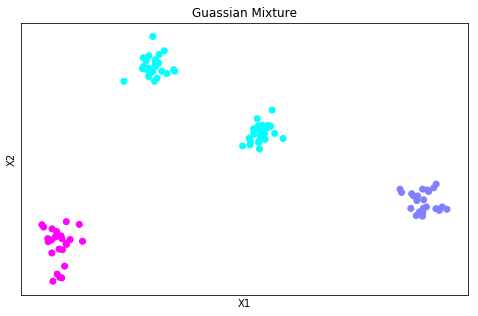

In [12]:
# Visualizing the plot for Gaussian Mixture
plt.figure(figsize=(8,5))
plt.scatter(principalDf.X, principalDf.Y, c=res1.predict(principalDf), cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.show()

## Question 2. 

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are over 600 unique records in the file, but you want to determine the exact number. Try k-means with 600-680 clusters applying Elbow method and analyzing Silhouette scores.

In [13]:
data2 = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results. ) Briefly explain your approach. 
\* You may first have to factorize the data set, as it contains string variables.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  

In [14]:
# a) first factorizing every column of data2
# Using elbow method to find out the point where the values stops changing by trying the range with interval (600, 680, 20)
factData = data2.apply(lambda x: pd.factorize(x)[0])
factData.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,1,1,0,0,0
2,0,0,1,1,2,2,2,2,1,0,...,1,0,0,0,2,2,2,0,0,0
3,0,0,2,2,3,3,3,3,2,0,...,0,0,0,0,3,2,3,0,0,0
4,0,0,1,3,4,4,4,1,0,1,...,0,1,0,0,4,1,1,1,0,0


C:\Users\ps336\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (618). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\Users\ps336\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (619). Possibly due to duplicate points in X.
  return_n_iter=True)


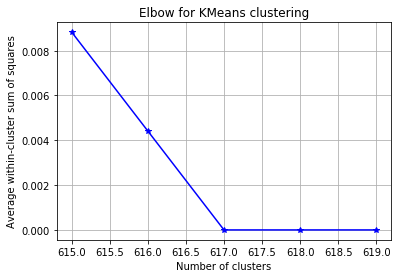

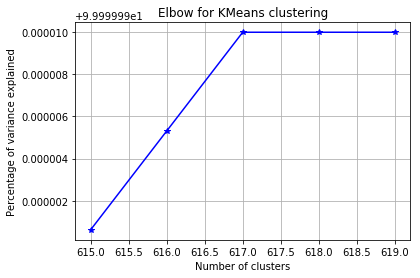

In [15]:
# Using elbow method to check the number of cluster for which the value changes, Value stops once we encounter duplicate rows
elbow(factData, range(615,620))

In [16]:
# using silhoutte_score also to find out the number of unique rows in dataframe
range_n_clusters = range(615, 620)
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(factData)
    #report average Silhouette score
    silhouette_avg = silhouette_score(factData, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =615, the average silhouette_score is :0.1906838095100105
For n_clusters =616, the average silhouette_score is :0.1878952982587655
For n_clusters =617, the average silhouette_score is :0.18529411764705883


C:\Users\ps336\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (618). Possibly due to duplicate points in X.
  return_n_iter=True)


For n_clusters =618, the average silhouette_score is :0.18529411764705883
For n_clusters =619, the average silhouette_score is :0.18529411764705883


C:\Users\ps336\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (619). Possibly due to duplicate points in X.
  return_n_iter=True)


So the value of silhoutte_score stops changing once we encouter duplicate rows. In this case, Value stops changing after 617, So the number of unque rows are 617.

In [17]:
# b) Droping the duplicates from data frame and then checking the number of Unique rows
Unique_Df = factData.drop_duplicates()
Unique_Df.shape

(617, 29)

## Question 3.

### Real world exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [18]:
#load the data
data3=pd.read_csv("data/stop_2012.csv", index_col='zipcode')
data3.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [19]:
#considering only the in-day timeline 
data3=data3.iloc[:,-6:]
data3.head()

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


#### a) Find and visualize 5 zip codes with most stops

#### b) Filter the data to have at least 30 stop&frisk observations per zip code

#### c) We want to cluster the zip codes by the stops timeline data set. Choose the number of clusters k for Kmeans. Try both - Elbow method and Silhouette score - for that. In case the results are inconsistent provide reasoning for your choice of k. 

#### d) Visualize the k-means clustering for the k you've chosen

#### e) Repeat d) using Guassian Mixture model

In [20]:
# a) Visualizing the top 5 zip codes for most stops 
data3['Total'] = data3.time_1 + data3.time_2 + data3.time_3 + data3.time_4 + data3.time_5 + data3.time_6
top5Zip = data3.sort_values(by=['Total'], ascending=False).head()
top5Zip

,time_1,time_2,time_3,time_4,time_5,time_6,Total
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


In [21]:
# Visualizing the top 5 zip codes using shape file
import geopandas as gpd
#read shapefiles of NYC zip codes
NYCzip=gpd.read_file('data/NY.shp')
NYCzip.head()

,zipcode,geometry
0,11372.0,POLYGON Z ((-73.86942457284175 40.749156870967...
1,11004.0,POLYGON Z ((-73.71068374074007 40.750040394509...
2,11040.0,POLYGON Z ((-73.70098278625547 40.738895699230...
3,11426.0,POLYGON Z ((-73.72270447144122 40.753733714383...
4,11365.0,POLYGON Z ((-73.81088634744755 40.727171875759...


In [22]:
NYCZip = NYCzip.merge(top5Zip, left_on='zipcode', right_index = True, how ='inner')

In [23]:
NYCZip.head()

,zipcode,geometry,time_1,time_2,time_3,time_4,time_5,time_6,Total
30,11212.0,POLYGON Z ((-73.9029413249695 40.6708401090905...,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
62,10456.0,POLYGON Z ((-73.91313620916213 40.839814109286...,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
75,10454.0,POLYGON Z ((-73.9317564471804 40.8079345777894...,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
144,11207.0,POLYGON Z ((-73.9036808841809 40.6904608744621...,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
178,11691.0,POLYGON Z ((-73.74690978489082 40.611725181962...,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


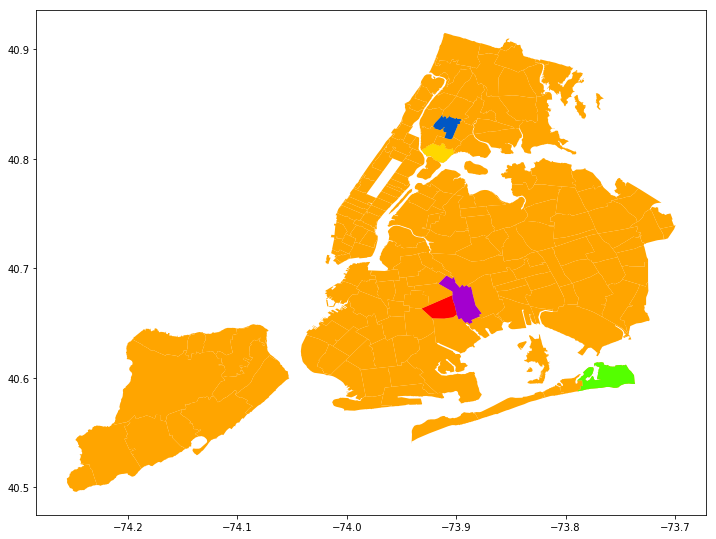

In [41]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_aspect('equal')
NYCzip.plot(ax=ax, color='orange', legend=True)
NYCZip.plot(ax=ax, cmap='prism', legend=True)

In [25]:
#b) filtering the data1 for atleast 30 stop&frisk observation per zipcode in all columns
ind=(data3.time_1>30)&(data3.time_2>30)&(data3.time_3>30)&(data3.time_4>30)&(data3.time_5>30)&(data3.time_6>30)
data_filtered = data3.loc[ind].copy()
data_filtered.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Total
zipcode,,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0,1747.0
10037,271.0,38.0,32.0,143.0,248.0,448.0,1180.0
10460,462.0,51.0,56.0,190.0,411.0,483.0,1653.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
11203,448.0,83.0,75.0,249.0,328.0,623.0,1806.0


In [26]:
# lets assume n_clusters=4
# since there 6 features given and before applying k-Means,
# Standardizing the features
data_modified = data3.drop(columns=['Total'])
data_std = pd.DataFrame(StandardScaler().fit_transform(data_modified))
data_std.head()

,0,1,2,3,4,5
0,1.012899,0.944735,0.750464,0.913915,1.129125,1.045516
1,0.640919,1.092039,0.076064,0.419683,0.372180,0.503742
2,1.551793,1.730359,0.723488,0.788396,1.024995,0.591938
3,0.097256,0.551922,0.210944,0.058816,0.508350,0.823767
4,5.524350,5.953089,2.180194,4.491210,5.598703,5.271354


In [27]:
#d) Applying K-means to standardized data
km=KMeans(random_state=1,n_clusters=4)
res=km.fit(data_std) #train the model
y_t=res.labels_

In [28]:
#create a dictionary mapping zip codes to cluster labels
clust={data3.index[i]:res.labels_[i] for i in range(len(res.labels_))}

In [29]:
#create a dataframe
result=pd.DataFrame({'zipcode':data3.index, 'label':res.labels_})

In [30]:
result.head()

,zipcode,label
0,10472,3
1,10037,2
2,10460,3
3,11224,2
4,10456,0


In [31]:
NYCzip['cluster']=NYCzip.zipcode.map(clust)
NYCzip.dropna(inplace=True)
NYCzip.head()

,zipcode,geometry,cluster
0,11372.0,POLYGON Z ((-73.86942457284175 40.749156870967...,1.0
1,11004.0,POLYGON Z ((-73.71068374074007 40.750040394509...,1.0
3,11426.0,POLYGON Z ((-73.72270447144122 40.753733714383...,1.0
4,11365.0,POLYGON Z ((-73.81088634744755 40.727171875759...,1.0
5,11373.0,POLYGON Z ((-73.88722098467157 40.727526187661...,1.0


C:\Users\ps336\Anaconda3\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


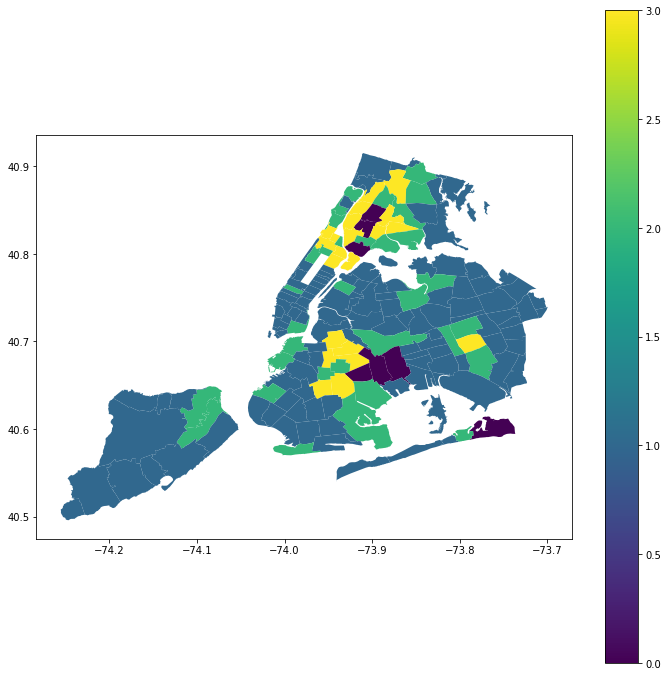

In [32]:
f, ax = plt.subplots(1, figsize=(12, 12))
NYCzip.plot(axes=ax, column='cluster', legend=True)

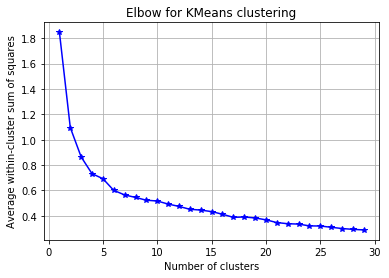

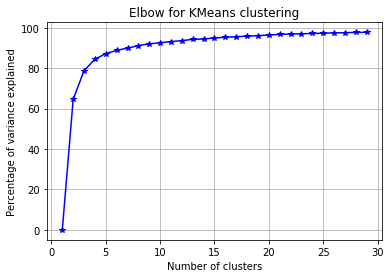

In [33]:
# Checking the number of optimal cluster by Elbow method
elbow(data_std, range(1,30))

Here, after applying the Elbow method, Elbow point looks to be at n = 2 or n = 3

In [34]:
# using silhoutte_score also to find out the number of Clusters for which the value of silhoutte_score is maximum 
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(data_std)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data_std, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.706414292107791
For n_clusters =3, the average silhouette_score is :0.647729793285601
For n_clusters =4, the average silhouette_score is :0.5847489867012106
For n_clusters =5, the average silhouette_score is :0.5803178207672047
For n_clusters =6, the average silhouette_score is :0.4133806892961612


In [35]:
# Repeating the steps for Gaussian Clustering with assumed value n=4
from sklearn.mixture import GaussianMixture
n=4
gm=GaussianMixture(n_components=n,random_state=324)
res1=gm.fit(data_std)

In [36]:
# printing the labels we get after doing the clustering using Gaussian Mixture
c=res1.predict(data_std)
c

array([1, 2, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
#create a dictionary mapping zip codes to cluster labels
clustGM={data1.index[i]:c[i] for i in range(len(c))}

IndexError: index 100 is out of bounds for axis 0 with size 100

In [ ]:
#create a dataframe
resultGM=pd.DataFrame({'zipcode':data1.index, 'label':c})
resultGM.head()

In [ ]:
NYCzip['clusterGM']=NYCzip.zipcode.map(clustGM)
NYCzip.dropna(inplace=True)
NYCzip.head()

In [ ]:
f, ax = plt.subplots(1, figsize=(12, 12))
NYCzip.plot(ax=ax, column='clusterGM', legend=True)